# Loading Required Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Loading Adjusted noise values for different samples

In [3]:
re06= pd.read_csv('EBUS06/epi/sorted_noise_epi.csv', index_col=0)
re28= pd.read_csv('EBUS28/epi/sorted_noise_epi.csv', index_col=0)
rb58= pd.read_csv('BRONCHO_58/epi/sorted_noise_epi.csv', index_col=0)
re49= pd.read_csv('EBUS49/epi/sorted_noise_epi.csv', index_col=0)
rn01= pd.read_csv('LUNG_N01/epi/sorted_noise_epi.csv', index_col=0)
rn06= pd.read_csv('LUNG_N06/epi/sorted_noise_epi.csv', index_col=0)
rn08= pd.read_csv('LUNG_N08/epi/sorted_noise_epi.csv', index_col=0)
rn09= pd.read_csv('LUNG_N09/epi/sorted_noise_epi.csv', index_col=0)
rn18= pd.read_csv('LUNG_N18/epi/sorted_noise_epi.csv', index_col=0)
rn19= pd.read_csv('LUNG_N19/epi/sorted_noise_epi.csv', index_col=0)
rn20= pd.read_csv('LUNG_N20/epi/sorted_noise_epi.csv', index_col=0)
rn28= pd.read_csv('LUNG_N28/epi/sorted_noise_epi.csv', index_col=0)
rn30= pd.read_csv('LUNG_N30/epi/sorted_noise_epi.csv', index_col=0)
rn34= pd.read_csv('LUNG_N34/epi/sorted_noise_epi.csv', index_col=0)
rt25= pd.read_csv('LUNG_T25/epi/sorted_noise_epi.csv', index_col=0)
rt06= pd.read_csv('LUNG_T06/epi/sorted_noise_epi.csv', index_col=0)
rt08= pd.read_csv('LUNG_T08/epi/sorted_noise_epi.csv', index_col=0)
rt18= pd.read_csv('LUNG_T18/epi/sorted_noise_epi.csv', index_col=0)
rt09= pd.read_csv('LUNG_T09/epi/sorted_noise_epi.csv', index_col=0)
rt31= pd.read_csv('LUNG_T31/epi/sorted_noise_epi.csv', index_col=0)
rt20= pd.read_csv('LUNG_T20/epi/sorted_noise_epi.csv', index_col=0)
rt28= pd.read_csv('LUNG_T28/epi/sorted_noise_epi.csv', index_col=0)
rt30= pd.read_csv('LUNG_T30/epi/sorted_noise_epi.csv', index_col=0)
rt34= pd.read_csv('LUNG_T34/epi/sorted_noise_epi.csv', index_col=0)

# Collecting all the gene names accross samples into a single list

In [5]:
noise1= re06.index
noise1.append(re28.index)
noise1.append(rb58.index)
noise1.append(re49.index)
noise1.append(rn01.index)
noise1.append(rn06.index)
noise1.append(rn08.index)
noise1.append(rn09.index)
noise1.append(rn18.index)
noise1.append(rn19.index)
noise1.append(rn20.index)
noise1.append(rn28.index)
noise1.append(rn30.index)
noise1.append(rn34.index)
noise1.append(rt25.index)
noise1.append(rt06.index)
noise1.append(rt08.index)
noise1.append(rt18.index)
noise1.append(rt09.index)
noise1.append(rt31.index)
noise1.append(rt20.index)
noise1.append(rt28.index)
noise1.append(rt30.index)
noise1.append(rt34.index)
#Remove redundant genes
noise = [*set(noise1)]
#Print The total nuber of genes available
len(noise)

9186

# Consolidating all the sample wise adjusted noise values into a single dataframe

In [6]:
nd = pd.DataFrame(columns=["LUNGN01","LUNGN06", "LUNGN08", "LUNGN09", "LUNGN19", "LUNGN18","LUNGN20", "LUNGN28", "LUNGN30", "LUNGN34", "LUNGT06", "LUNGT08", "LUNGT18","LUNGT20","LUNGT25" ,"LUNGT30","LUNGT34" ,"LUNGT09","LUNGT28", "LUNGT31", "EBUS06","EBUS28","EBUS49", "BRONCHO58"],index= noise)
nd.EBUS06= re06.x
nd.EBUS28= re28.x
nd.EBUS49= re49.x
nd.BRONCHO58= rb58.x
nd.LUNGN01= rn01.x
nd.LUNGN06= rn06.x
nd.LUNGN08= rn08.x
nd.LUNGN09= rn09.x
nd.LUNGN19= rn19.x
nd.LUNGN18= rn18.x
nd.LUNGN20= rn20.x
nd.LUNGN28= rn28.x
nd.LUNGN30= rn30.x
nd.LUNGN34= rn34.x
nd.LUNGT06= rt06.x
nd.LUNGT08= rt08.x
nd.LUNGT09= rt09.x
nd.LUNGT18= rt18.x
nd.LUNGT20= rt20.x
nd.LUNGT25= rt25.x
nd.LUNGT28= rt28.x
nd.LUNGT30= rt30.x
nd.LUNGT31= rt31.x
nd.LUNGT34= rt34.x

# Sample Normalization

In [7]:
#median noralisation
median_values = nd.median()

# Calculate the median absolute deviation (MAD) of each column
mad_values = nd.mad()

# Perform median normalization
normalized_df = (nd - median_values) / mad_values

#log transformation to remove rightskewness of the data
skewness = normalized_df.skew()
#Defining a function to perform log transformation  of a column
def log_transformation(column):
    log_column = np.log1p(column)
    return log_column

right_skewed_columns = skewness[skewness > 1].index  # Filter columns with skewness greater than 1
normalized_df[right_skewed_columns] = normalized_df[right_skewed_columns].apply(log_transformation)
skewness = normalized_df.skew()
print(skewness)

LUNGN01     -0.753218
LUNGN06     -1.246272
LUNGN08     -0.942793
LUNGN09     -1.133827
LUNGN19     -1.368470
LUNGN18     -1.080404
LUNGN20     -1.120344
LUNGN28     -1.157799
LUNGN30     -1.103013
LUNGN34     -0.545782
LUNGT06     -1.216252
LUNGT08     -1.660377
LUNGT18     -0.758970
LUNGT20     -0.590304
LUNGT25     -1.128188
LUNGT30     -0.523218
LUNGT34     -0.476523
LUNGT09     -1.046888
LUNGT28     -0.434108
LUNGT31     -0.891660
EBUS06      -0.576623
EBUS28       2.611946
EBUS49      -1.085195
BRONCHO58   -0.757277
dtype: float64


c:\Users\deeya\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Filtering DataFrame

In [8]:
#filtering dataframe by selecting genes with enough data points for stages
mask1= normalized_df.iloc[:, :10].notna().sum(axis=1) >= 4
mask2= normalized_df.iloc[:, 10:17].notna().sum(axis=1) >= 3
mask3= normalized_df.iloc[:, 17:20].notna().sum(axis=1) >= 1
mask4= normalized_df.iloc[:, 20:].notna().sum(axis=1) >= 2
mask_combined = mask1&mask2&mask3&mask4
df = normalized_df[mask_combined]

# Linear Regression to check increasing trend in noise

In [9]:
#Setting font as Mirosoft Sans Serif
plt.rcParams['font.sans-serif'] = 'Microsoft Sans Serif'


#### Assign ordinal variables to samples according to their stage of cancer progression ####
#### Adjacent non-cancerous:0 ; Tumor stage 1:1; Tumor stage 2: 2; Tumor stage 3:3; Metastasis: 4 ####


pdf=df.T
new_index = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,3,3,4,4,4,4]
pdf.reset_index(drop=True, inplace=True)
pdf.index = new_index
pdf=pdf.T

#### Defining a function to perform linear regression with Y axis= Adjusted noise and X axis= Stages of cancer progression

#### THis function returns set of genes with a positive slope value in the regression test:

def calculate_slope(row):
    x = np.arange(len(row))
    non_na_values = row[~np.isnan(row)]
    
    if len(non_na_values) == 0:
        return np.nan, np.nan

    slope, _, _, _, _ = linregress(x[:len(non_na_values)], non_na_values)
    return slope

## Aplying the function to the dataframe and storing Rsquared values and slope values 
new_df=pd.DataFrame(columns=['slope'], index=pdf.index)
new_df['slope'] = pdf.apply(calculate_slope, axis=1)
increasing_noise = new_df[(new_df['slope'] > new_df['slope'].quantile(0.99))]

print(len(increasing_noise))
sorted_df= increasing_noise.sort_values('slope', ascending= False)
print(sorted_df)

37
             slope
MT-CO3    0.299766
MT-CO1    0.257157
SFTPB     0.216033
NAA38     0.204916
NDUFV2    0.197834
COL27A1   0.184262
RBM8A     0.179995
ASAH1     0.171986
CLEC2B    0.167243
TGFBI     0.150409
GPNMB     0.149362
HSPA14    0.143924
MRPL44    0.143256
PRDX2     0.138544
LSM2      0.136401
ALDH2     0.136251
SLC16A3   0.136247
ARL6IP1   0.134419
CD44      0.134020
DTX2      0.133089
PGK1      0.131990
HIST1H4C  0.131425
PEBP4     0.131279
MT-ND1    0.130563
NUPR1     0.129824
FCGRT     0.129000
TXN       0.127692
PSMB6     0.123535
BNIP3     0.122743
SEC62     0.122178
AIMP2     0.121870
CCL3L3    0.119865
H2AFZ     0.118536
APOE      0.117273
HMGA1     0.116124
NUCKS1    0.115842
ENO1      0.115065


# Heatmap representation

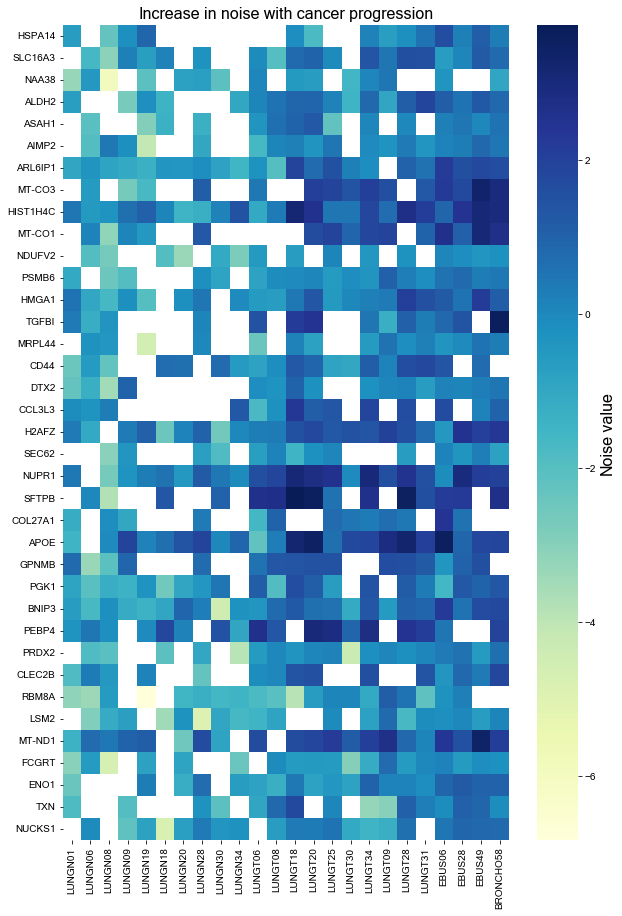

In [10]:
#producing the final dataframe
fdf = df[df.index.isin(sorted_df.index)]
fdf.to_csv("Genes_increasing_noise.csv")
fig, ax = plt.subplots(figsize=(10,15))
ax = sns.heatmap(fdf,cmap= 'YlGnBu')
# Get the color bar object
cbar = ax.collections[0].colorbar
ax.set_title("Increase in noise with cancer progression", fontsize= 16)
# Set the label for the color bar
cbar.set_label('Noise value', fontsize=16)
plt.savefig('Stagewise_increasing_noise.pdf')